In [1]:
import json
import codecs

In [2]:
path = '../../../../DATA/ml/python_data_analysis/ch02/usagov_bitly_data2012-03-16-1331923249.txt'

In [3]:
records = open(path, 'r', encoding = "utf-8").readlines()

In [4]:
records = [json.loads(line) for line in codecs.open(path, "r", "utf-8")]

In [5]:
records[0]

{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 'al': 'en-US,en;q=0.8',
 'c': 'US',
 'cy': 'Danvers',
 'g': 'A6qOVH',
 'gr': 'MA',
 'h': 'wfLQtf',
 'hc': 1331822918,
 'hh': '1.usa.gov',
 'l': 'orofrog',
 'll': [42.576698, -70.954903],
 'nk': 1,
 'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 't': 1331923247,
 'tz': 'America/New_York',
 'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991'}

In [6]:
records[0]['tz']

'America/New_York'

In [7]:
records[0]['a']

'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11'

빈도가 가장 높은 표준시간대 tz필드 구하기

In [8]:
time_zones = [rec['tz'] for rec in records if 'tz' in rec]

In [9]:
time_zones[:10]

['America/New_York',
 'America/Denver',
 'America/New_York',
 'America/Sao_Paulo',
 'America/New_York',
 'America/New_York',
 'Europe/Warsaw',
 '',
 '',
 '']

In [10]:
def get_counts(sequence):
    counts = {}
    for x in sequence:
        if x in counts:
            counts[x] += 1
        else:
            counts[x] = 1
    return counts

In [11]:
from collections import defaultdict
def get_counts2(sequence):
    counts = defaultdict(int)
    for x in sequence:
        counts[x] += 1
    return counts

In [12]:
counts = get_counts(time_zones)
print(counts)

{'America/New_York': 1251, 'America/Denver': 191, 'America/Sao_Paulo': 33, 'Europe/Warsaw': 16, '': 521, 'America/Los_Angeles': 382, 'Asia/Hong_Kong': 10, 'Europe/Rome': 27, 'Africa/Ceuta': 2, 'Europe/Madrid': 35, 'Asia/Kuala_Lumpur': 3, 'Asia/Nicosia': 1, 'Europe/London': 74, 'Pacific/Honolulu': 36, 'America/Chicago': 400, 'Europe/Malta': 2, 'Europe/Lisbon': 8, 'Europe/Paris': 14, 'Europe/Copenhagen': 5, 'America/Mazatlan': 1, 'Europe/Dublin': 3, 'Europe/Brussels': 4, 'America/Vancouver': 12, 'Europe/Amsterdam': 22, 'Europe/Prague': 10, 'Europe/Stockholm': 14, 'America/Anchorage': 5, 'Asia/Bangkok': 6, 'Europe/Berlin': 28, 'America/Rainy_River': 25, 'Europe/Budapest': 5, 'Asia/Tokyo': 37, 'Europe/Vienna': 6, 'America/Phoenix': 20, 'Asia/Jerusalem': 3, 'Asia/Karachi': 3, 'America/Bogota': 3, 'America/Indianapolis': 20, 'America/Montreal': 9, 'Asia/Calcutta': 9, 'Europe/Skopje': 1, 'Asia/Beirut': 4, 'Australia/NSW': 6, 'Chile/Continental': 6, 'America/Halifax': 4, 'America/Edmonton': 6,

In [13]:
counts['America/New_York']

1251

In [14]:
len(time_zones)

3440

상위 10개의 표준시간대

In [15]:
def top_counts(count_dict, n=10):
    value_key_pairs = [(count, tz) for tz, count in count_dict.items()]
    value_key_pairs.sort()
    return value_key_pairs[-n:]

In [16]:
top_counts(counts)

[(33, 'America/Sao_Paulo'),
 (35, 'Europe/Madrid'),
 (36, 'Pacific/Honolulu'),
 (37, 'Asia/Tokyo'),
 (74, 'Europe/London'),
 (191, 'America/Denver'),
 (382, 'America/Los_Angeles'),
 (400, 'America/Chicago'),
 (521, ''),
 (1251, 'America/New_York')]

파이썬 라이브러리 사용

In [17]:
from collections import Counter

In [18]:
counts = Counter(time_zones)
print(counts)

Counter({'America/New_York': 1251, '': 521, 'America/Chicago': 400, 'America/Los_Angeles': 382, 'America/Denver': 191, 'Europe/London': 74, 'Asia/Tokyo': 37, 'Pacific/Honolulu': 36, 'Europe/Madrid': 35, 'America/Sao_Paulo': 33, 'Europe/Berlin': 28, 'Europe/Rome': 27, 'America/Rainy_River': 25, 'Europe/Amsterdam': 22, 'America/Phoenix': 20, 'America/Indianapolis': 20, 'Europe/Warsaw': 16, 'America/Mexico_City': 15, 'Europe/Paris': 14, 'Europe/Stockholm': 14, 'America/Vancouver': 12, 'Pacific/Auckland': 11, 'Asia/Hong_Kong': 10, 'Europe/Prague': 10, 'Europe/Moscow': 10, 'Europe/Helsinki': 10, 'America/Puerto_Rico': 10, 'Europe/Oslo': 10, 'America/Montreal': 9, 'Asia/Calcutta': 9, 'Asia/Istanbul': 9, 'Europe/Lisbon': 8, 'Asia/Bangkok': 6, 'Europe/Vienna': 6, 'Australia/NSW': 6, 'Chile/Continental': 6, 'America/Edmonton': 6, 'Europe/Athens': 6, 'Europe/Copenhagen': 5, 'America/Anchorage': 5, 'Europe/Budapest': 5, 'Asia/Seoul': 5, 'Europe/Brussels': 4, 'Asia/Beirut': 4, 'America/Halifax': 4

In [19]:
counts.most_common(10)

[('America/New_York', 1251),
 ('', 521),
 ('America/Chicago', 400),
 ('America/Los_Angeles', 382),
 ('America/Denver', 191),
 ('Europe/London', 74),
 ('Asia/Tokyo', 37),
 ('Pacific/Honolulu', 36),
 ('Europe/Madrid', 35),
 ('America/Sao_Paulo', 33)]

In [20]:
help(Counter)

Help on class Counter in module collections:

class Counter(builtins.dict)
 |  Dict subclass for counting hashable items.  Sometimes called a bag
 |  or multiset.  Elements are stored as dictionary keys and their counts
 |  are stored as dictionary values.
 |  
 |  >>> c = Counter('abcdeabcdabcaba')  # count elements from a string
 |  
 |  >>> c.most_common(3)                # three most common elements
 |  [('a', 5), ('b', 4), ('c', 3)]
 |  >>> sorted(c)                       # list all unique elements
 |  ['a', 'b', 'c', 'd', 'e']
 |  >>> ''.join(sorted(c.elements()))   # list elements with repetitions
 |  'aaaaabbbbcccdde'
 |  >>> sum(c.values())                 # total of all counts
 |  15
 |  
 |  >>> c['a']                          # count of letter 'a'
 |  5
 |  >>> for elem in 'shazam':           # update counts from an iterable
 |  ...     c[elem] += 1                # by adding 1 to each element's count
 |  >>> c['a']                          # now there are seven 'a'
 |  7
 

#### 데이터프레임

In [21]:
import pandas as pd

In [22]:
frame = pd.DataFrame(records)

In [23]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 18 columns):
_heartbeat_    120 non-null float64
a              3440 non-null object
al             3094 non-null object
c              2919 non-null object
cy             2919 non-null object
g              3440 non-null object
gr             2919 non-null object
h              3440 non-null object
hc             3440 non-null float64
hh             3440 non-null object
kw             93 non-null object
l              3440 non-null object
ll             2919 non-null object
nk             3440 non-null float64
r              3440 non-null object
t              3440 non-null float64
tz             3440 non-null object
u              3440 non-null object
dtypes: float64(4), object(14)
memory usage: 500.7+ KB


In [24]:
frame['tz'][:10]

0     America/New_York
1       America/Denver
2     America/New_York
3    America/Sao_Paulo
4     America/New_York
5     America/New_York
6        Europe/Warsaw
7                     
8                     
9                     
Name: tz, dtype: object

In [25]:
tz_counts = frame['tz'].value_counts()

In [26]:
tz_counts[:10]

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
Name: tz, dtype: int64

#### fillna
* 없는 값은 fillna로 대체
* 비어있는 값은 Unknown으로 대체

In [27]:
clean_tz = frame['tz'].fillna('Missing')
print(clean_tz)

0          America/New_York
1            America/Denver
2          America/New_York
3         America/Sao_Paulo
4          America/New_York
5          America/New_York
6             Europe/Warsaw
7                          
8                          
9                          
10      America/Los_Angeles
11         America/New_York
12         America/New_York
13                  Missing
14         America/New_York
15           Asia/Hong_Kong
16           Asia/Hong_Kong
17         America/New_York
18           America/Denver
19              Europe/Rome
20             Africa/Ceuta
21         America/New_York
22         America/New_York
23         America/New_York
24            Europe/Madrid
25        Asia/Kuala_Lumpur
26             Asia/Nicosia
27        America/Sao_Paulo
28                         
29                         
               ...         
3530    America/Los_Angeles
3531                       
3532       America/New_York
3533       America/New_York
3534        America/

In [28]:
clean_tz[clean_tz == ''] = 'Unknown'

In [29]:
tz_counts = clean_tz.value_counts()

In [30]:
tz_counts[:10]

America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Missing                 120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
Name: tz, dtype: int64

In [31]:
%matplotlib inline

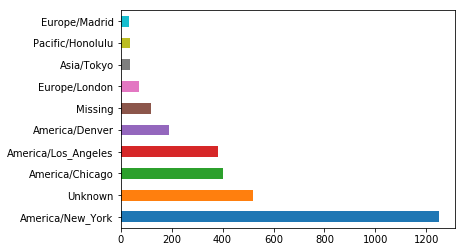

In [32]:
tz_counts[:10].plot(kind='barh', rot=0)

#### URL을 축약하는데 사용한 브라우저, 단말기, 애플리케이션
내장 문자열 함수, 정규표현식

In [33]:
print(frame['a'][1])
print(frame['a'][50])
print(frame['a'][51])

GoogleMaps/RochesterNY
Mozilla/5.0 (Windows NT 5.1; rv:10.0.2) Gecko/20100101 Firefox/10.0.2
Mozilla/5.0 (Linux; U; Android 2.2.2; en-us; LG-P925/V10e Build/FRG83G) AppleWebKit/533.1 (KHTML, like Gecko) Version/4.0 Mobile Safari/533.1


In [34]:
results = pd.Series([x.split()[0] for x in frame.a.dropna()])

In [35]:
results[:5]

0               Mozilla/5.0
1    GoogleMaps/RochesterNY
2               Mozilla/4.0
3               Mozilla/5.0
4               Mozilla/5.0
dtype: object

In [36]:
results.value_counts()

Mozilla/5.0                                          2594
Mozilla/4.0                                           601
GoogleMaps/RochesterNY                                121
Opera/9.80                                             34
TEST_INTERNET_AGENT                                    24
GoogleProducer                                         21
Mozilla/6.0                                             5
BlackBerry8520/5.0.0.681                                4
Dalvik/1.4.0                                            3
BlackBerry8520/5.0.0.592                                3
BlackBerry9630/5.0.0.975                                2
Acoon                                                   2
Goldfire                                                2
Socialite/7766                                          2
ICE                                                     1
Vodafone/1.0/LG-KU990i/V10c                             1
BlackBerry9700/5.0.0.862                                1
BlackBerry9530

#### 윈도우 사용자와 비윈도우 사용자로 나눈다

In [37]:
# agent가 없는 값은 제외
cframe = frame[frame.a.notnull()]

In [38]:
import numpy as np
operating_system = np.where(cframe['a'].str.contains('Windows'), 'Windows', 'Not Windows')

In [39]:
operating_system[:5]

array(['Windows', 'Not Windows', 'Windows', 'Not Windows', 'Windows'],
      dtype='<U11')

#### 데이터 묶기 표준 시간대 + 운영체제

In [40]:
by_tz_os = cframe.groupby(['tz', operating_system])
print(len(by_tz_os))
print(type(by_tz_os))

149
<class 'pandas.core.groupby.DataFrameGroupBy'>


In [41]:
agg_counts = by_tz_os.size().unstack().fillna(0)

In [42]:
agg_counts[:10]

,Not Windows,Windows
tz,,
,245.0,276.0
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0
Africa/Lusaka,0.0,1.0
America/Anchorage,4.0,1.0
America/Argentina/Buenos_Aires,1.0,0.0
America/Argentina/Cordoba,0.0,1.0


In [43]:
indexer = agg_counts.sum(1).argsort()

In [44]:
indexer[:10]

tz
                                  24
Africa/Cairo                      20
Africa/Casablanca                 21
Africa/Ceuta                      92
Africa/Johannesburg               87
Africa/Lusaka                     53
America/Anchorage                 54
America/Argentina/Buenos_Aires    57
America/Argentina/Cordoba         26
America/Argentina/Mendoza         55
dtype: int64

In [45]:
count_subset = agg_counts.take(indexer)[-10:]

In [46]:
count_subset

,Not Windows,Windows
tz,,
America/Sao_Paulo,13.0,20.0
Europe/Madrid,16.0,19.0
Pacific/Honolulu,0.0,36.0
Asia/Tokyo,2.0,35.0
Europe/London,43.0,31.0
America/Denver,132.0,59.0
America/Los_Angeles,130.0,252.0
America/Chicago,115.0,285.0
,245.0,276.0


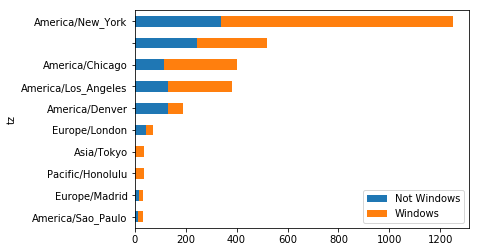

In [47]:
count_subset.plot(kind='barh', stacked=True)

#### 상대비율

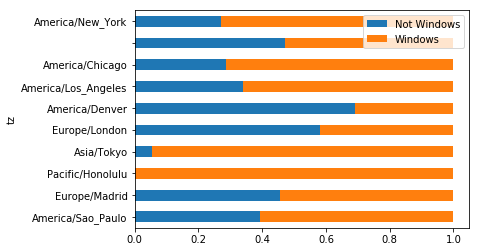

In [48]:
normed_subset = count_subset.div(count_subset.sum(1), axis=0)
normed_subset.plot(kind='barh', stacked=True)

## 2.2 MovieLens의 영화 평점 데이터

In [49]:
import pandas as pd
import os 
encoding = 'latin1'

upath = os.path.expanduser('../../../../DATA/ml/python_data_analysis/ch02/ml-1m/users.dat')
rpath = os.path.expanduser('../../../../DATA/ml/python_data_analysis/ch02/ml-1m/ratings.dat')
mpath = os.path.expanduser('../../../../DATA/ml/python_data_analysis/ch02/ml-1m/movies.dat')

unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
mnames = ['movie_id', 'title', 'genres']

users = pd.read_csv(upath, sep='::', header=None, names=unames, encoding=encoding)
ratings = pd.read_csv(rpath, sep='::', header=None, names=rnames, encoding=encoding)
movies = pd.read_csv(mpath, sep='::', header=None, names=mnames, encoding=encoding)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  del sys.path[0]
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  from ipykernel import kernelapp as app


In [50]:
users[:5]

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [51]:
ratings[:5]

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [52]:
movies[:5]

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [53]:
data = pd.merge(pd.merge(ratings, users), movies)
data

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama
5,18,1193,4,978156168,F,18,3,95825,One Flew Over the Cuckoo's Nest (1975),Drama
6,19,1193,5,982730936,M,1,10,48073,One Flew Over the Cuckoo's Nest (1975),Drama
7,24,1193,5,978136709,F,25,7,10023,One Flew Over the Cuckoo's Nest (1975),Drama
8,28,1193,3,978125194,F,25,1,14607,One Flew Over the Cuckoo's Nest (1975),Drama
9,33,1193,5,978557765,M,45,3,55421,One Flew Over the Cuckoo's Nest (1975),Drama


In [54]:
data.ix[0]

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


user_id                                            1
movie_id                                        1193
rating                                             5
timestamp                                  978300760
gender                                             F
age                                                1
occupation                                        10
zip                                            48067
title         One Flew Over the Cuckoo's Nest (1975)
genres                                         Drama
Name: 0, dtype: object

In [73]:
mean_ratings = mean_ratings = data.pivot_table('rating', index='title', columns='gender', aggfunc='mean')

In [74]:
mean_ratings[:5]

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024


In [75]:
ratings_by_title = data.groupby('title').size()

In [77]:
ratings_by_title[:10]

title
$1,000,000 Duck (1971)                37
'Night Mother (1986)                  70
'Til There Was You (1997)             52
'burbs, The (1989)                   303
...And Justice for All (1979)        199
1-900 (1994)                           2
10 Things I Hate About You (1999)    700
101 Dalmatians (1961)                565
101 Dalmatians (1996)                364
12 Angry Men (1957)                  616
dtype: int64

In [55]:
ratings_by_title = data.groupby('title').size()

In [56]:
ratings_by_title[:10]

title
$1,000,000 Duck (1971)                37
'Night Mother (1986)                  70
'Til There Was You (1997)             52
'burbs, The (1989)                   303
...And Justice for All (1979)        199
1-900 (1994)                           2
10 Things I Hate About You (1999)    700
101 Dalmatians (1961)                565
101 Dalmatians (1996)                364
12 Angry Men (1957)                  616
dtype: int64

250건 이상의 평점 정보가 있는 영화에 대한 색인

In [79]:
active_titles = ratings_by_title.index[ratings_by_title >= 250]

In [80]:
active_titles

Index([''burbs, The (1989)', '10 Things I Hate About You (1999)',
       '101 Dalmatians (1961)', '101 Dalmatians (1996)', '12 Angry Men (1957)',
       '13th Warrior, The (1999)', '2 Days in the Valley (1996)',
       '20,000 Leagues Under the Sea (1954)', '2001: A Space Odyssey (1968)',
       '2010 (1984)',
       ...
       'X-Men (2000)', 'Year of Living Dangerously (1982)',
       'Yellow Submarine (1968)', 'You've Got Mail (1998)',
       'Young Frankenstein (1974)', 'Young Guns (1988)',
       'Young Guns II (1990)', 'Young Sherlock Holmes (1985)',
       'Zero Effect (1998)', 'eXistenZ (1999)'],
      dtype='object', name='title', length=1216)

#### ?

In [81]:
mean_ratings = mean_ratings.loc[active_titles]

In [82]:
mean_ratings

gender,F,M
title,,
"'burbs, The (1989)",2.793478,2.962085
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215
12 Angry Men (1957),4.184397,4.328421
"13th Warrior, The (1999)",3.112000,3.168000
2 Days in the Valley (1996),3.488889,3.244813
"20,000 Leagues Under the Sea (1954)",3.670103,3.709205
2001: A Space Odyssey (1968),3.825581,4.129738


In [83]:
top_female_ratings = mean_ratings.sort_index(by = 'F', ascending = False)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  """Entry point for launching an IPython kernel.


In [84]:
top_female_ratings[:10]

gender,F,M
title,,
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075
Schindler's List (1993),4.562602,4.491415
"Shawshank Redemption, The (1994)",4.539075,4.560625
"Grand Day Out, A (1992)",4.537879,4.293255
To Kill a Mockingbird (1962),4.536667,4.372611
Creature Comforts (1990),4.513889,4.272277


### 평균차이 구하기

In [85]:
mean_ratings['diff'] = mean_ratings['M'] - mean_ratings['F']

In [86]:
sorted_by_diff = mean_ratings.sort_values(by='diff')

#### 여성들이 더 선호하는 순

In [87]:
sorted_by_diff[:15]

gender,F,M,diff
title,,,
Dirty Dancing (1987),3.790378,2.959596,-0.830782
Jumpin' Jack Flash (1986),3.254717,2.578358,-0.676359
Grease (1978),3.975265,3.367041,-0.608224
Little Women (1994),3.870588,3.321739,-0.548849
Steel Magnolias (1989),3.901734,3.365957,-0.535777
Anastasia (1997),3.800000,3.281609,-0.518391
"Rocky Horror Picture Show, The (1975)",3.673016,3.160131,-0.512885
"Color Purple, The (1985)",4.158192,3.659341,-0.498851
"Age of Innocence, The (1993)",3.827068,3.339506,-0.487561


#### 남성들이 더 선호하는 순

In [88]:
sorted_by_diff[::-1][:15]

gender,F,M,diff
title,,,
"Good, The Bad and The Ugly, The (1966)",3.494949,4.221300,0.726351
"Kentucky Fried Movie, The (1977)",2.878788,3.555147,0.676359
Dumb & Dumber (1994),2.697987,3.336595,0.638608
"Longest Day, The (1962)",3.411765,4.031447,0.619682
"Cable Guy, The (1996)",2.250000,2.863787,0.613787
Evil Dead II (Dead By Dawn) (1987),3.297297,3.909283,0.611985
"Hidden, The (1987)",3.137931,3.745098,0.607167
Rocky III (1982),2.361702,2.943503,0.581801
Caddyshack (1980),3.396135,3.969737,0.573602


### 호불호가 극명하게 나뉘는 영화를 찾아본다. 

In [89]:
# 평점을 표준편차
rating_std_by_title = data.groupby('title')['rating'].std()

In [92]:
# active_titles만 선택
rating_std_by_title = rating_std_by_title.loc[active_titles]

In [95]:
rating_std_by_title.sort_values(ascending=False)[:10]

title
Dumb & Dumber (1994)                     1.321333
Blair Witch Project, The (1999)          1.316368
Natural Born Killers (1994)              1.307198
Tank Girl (1995)                         1.277695
Rocky Horror Picture Show, The (1975)    1.260177
Eyes Wide Shut (1999)                    1.259624
Evita (1996)                             1.253631
Billy Madison (1995)                     1.249970
Fear and Loathing in Las Vegas (1998)    1.246408
Bicentennial Man (1999)                  1.245533
Name: rating, dtype: float64

# 신생아 이름

In [96]:
import pandas as pd

In [97]:
names1880 = pd.read_csv('../../../../DATA/ml/python_data_analysis/ch02/yob1880.csv', names=['name', 'sex', 'births'])

In [99]:
names1880[:10]

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
5,Margaret,F,1578
6,Ida,F,1472
7,Alice,F,1414
8,Bertha,F,1320
9,Sarah,F,1288


In [100]:
names1880.groupby('sex').births.sum()

sex
F     90993
M    110493
Name: births, dtype: int64

## 여러파일 읽기

In [109]:
years = range(1880, 2013)

In [101]:
years_list = [1884, 1885, 1886, 1887, 1888, 1889, 1890, 1891, 1892, 1893, 1894, 1895, 1896, 1897, 1898, 1899, 1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 1880, 1881, 1882, 1883]

In [108]:
years_list.sort()
print(min(years_list))
print(max(years_list))

1880
2013


In [110]:
pieces = []
columns = ['name', 'sex', 'births']

for year in years:
    path = '../../../../DATA/ml/python_data_analysis/ch02/yob%d.txt' % year
    frame = pd.read_csv(path, names=columns)
    
    frame['year'] = year
    pieces.append(frame)

In [112]:
names = pd.concat(pieces, ignore_index=True)

In [115]:
names.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1759019 entries, 0 to 1759018
Data columns (total 4 columns):
name      object
sex       object
births    int64
year      int64
dtypes: int64(2), object(2)
memory usage: 53.7+ MB


## groupby, pivot_table

In [116]:
total_births = names.pivot_table('births', index='year', columns = 'sex', aggfunc=sum)
total_births.tail()

sex,F,M
year,,
2008,1886765,2035811
2009,1832276,1978582
2010,1771846,1912915
2011,1752198,1891800
2012,1751866,1886972


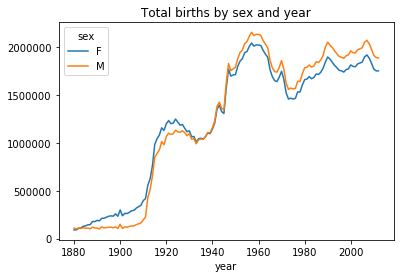

In [117]:
total_births.plot(title='Total births by sex and year')

In [118]:
def add_prop(group):
    # Integer division floors
    births = group.births.astype(float)
    group['prop'] = births / births.sum()
    return group

## ?

In [119]:
names = names.groupby(['year', 'sex']).apply(add_prop)

In [121]:
names[:5]

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188


In [128]:
names.births.sum()

329809673

In [129]:
test = names.births.astype(float)

In [130]:
test

0          7065.0
1          2604.0
2          2003.0
3          1939.0
4          1746.0
5          1578.0
6          1472.0
7          1414.0
8          1320.0
9          1288.0
10         1258.0
11         1226.0
12         1156.0
13         1063.0
14         1045.0
15         1040.0
16         1012.0
17          995.0
18          982.0
19          949.0
20          858.0
21          808.0
22          796.0
23          793.0
24          787.0
25          783.0
26          769.0
27          768.0
28          704.0
29          700.0
            ...  
1758989       5.0
1758990       5.0
1758991       5.0
1758992       5.0
1758993       5.0
1758994       5.0
1758995       5.0
1758996       5.0
1758997       5.0
1758998       5.0
1758999       5.0
1759000       5.0
1759001       5.0
1759002       5.0
1759003       5.0
1759004       5.0
1759005       5.0
1759006       5.0
1759007       5.0
1759008       5.0
1759009       5.0
1759010       5.0
1759011       5.0
1759012       5.0
1759013   

In [132]:
import numpy as np

In [133]:
np.allclose(names.groupby(['year', 'sex']).prop.sum(), 1)

True

> 그룹의 합이 충분히 1에 가까운지 확인하기 위해서 사용

#### 분석에 사용할 각 연도별, 성별에 따른 빈도수가 가장 높은 이름 1,000개 추출

In [134]:
def get_top1000(group):
    return group.sort_values(by='births', ascending=False)[:1000]
grouped = names.groupby(['year', 'sex'])
top1000 = grouped.apply(get_top1000)
top1000.index = np.arange(len(top1000))

In [136]:
top1000[:5]

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188


### 이름 유행 분석, 남자와 여자를 분리

In [138]:
boys = top1000[top1000.sex == 'M']
girls = top1000[top1000.sex == 'F']

In [139]:
total_births = top1000.pivot_table('births', index='year', columns='name', aggfunc=sum)

In [140]:
total_births

name,Aaden,Aaliyah,Aarav,Aaron,Aarush,Ab,Abagail,Abb,Abbey,Abbie,...,Zoa,Zoe,Zoey,Zoie,Zola,Zollie,Zona,Zora,Zula,Zuri
year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,102.0,NaN,NaN,NaN,NaN,NaN,71.0,...,8.0,23.0,NaN,NaN,7.0,NaN,8.0,28.0,27.0,NaN
1881,NaN,NaN,NaN,94.0,NaN,NaN,NaN,NaN,NaN,81.0,...,NaN,22.0,NaN,NaN,10.0,NaN,9.0,21.0,27.0,NaN
1882,NaN,NaN,NaN,85.0,NaN,NaN,NaN,NaN,NaN,80.0,...,8.0,25.0,NaN,NaN,9.0,NaN,17.0,32.0,21.0,NaN
1883,NaN,NaN,NaN,105.0,NaN,NaN,NaN,NaN,NaN,79.0,...,NaN,23.0,NaN,NaN,10.0,NaN,11.0,35.0,25.0,NaN
1884,NaN,NaN,NaN,97.0,NaN,NaN,NaN,NaN,NaN,98.0,...,13.0,31.0,NaN,NaN,14.0,6.0,8.0,58.0,27.0,NaN
1885,NaN,NaN,NaN,88.0,NaN,6.0,NaN,NaN,NaN,88.0,...,6.0,27.0,NaN,NaN,12.0,6.0,14.0,48.0,38.0,NaN
1886,NaN,NaN,NaN,86.0,NaN,NaN,NaN,NaN,NaN,84.0,...,13.0,25.0,NaN,NaN,8.0,NaN,20.0,52.0,43.0,NaN
1887,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,104.0,...,9.0,34.0,NaN,NaN,23.0,NaN,28.0,46.0,33.0,NaN
1888,NaN,NaN,NaN,90.0,NaN,NaN,NaN,NaN,NaN,137.0,...,11.0,42.0,NaN,NaN,23.0,7.0,30.0,42.0,45.0,NaN


In [141]:
total_births.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 133 entries, 1880 to 2012
Columns: 6959 entries, Aaden to Zuri
dtypes: float64(6959)
memory usage: 7.1 MB


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001D2C30FFF28>,
      dtype=object)

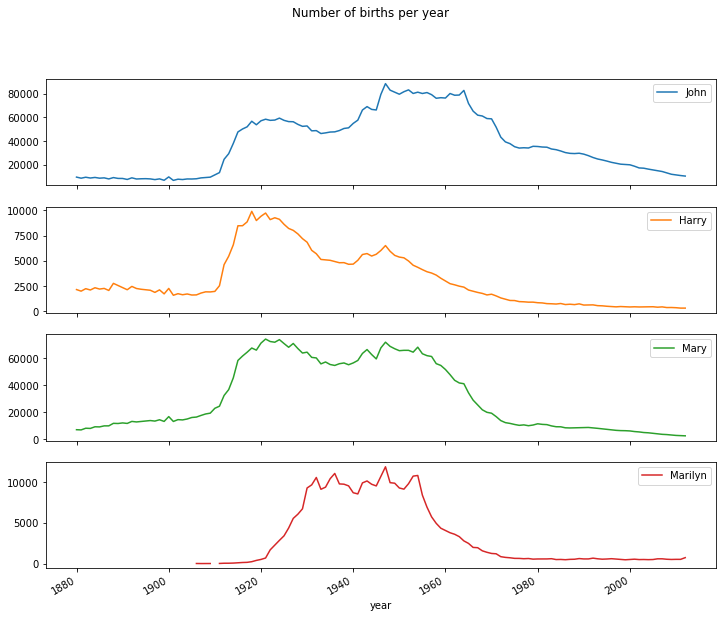

In [142]:
subset = total_births[['John', 'Harry', 'Mary', 'Marilyn']]
subset.plot(subplots=True, figsize=(12, 10), grid=False, title="Number of births per year")

흔한 이름은 기피함을 알기 위해, <br>
인기있는 이름 1,000개가 전체 출생수에서 차지하는 비율을 그래프로 

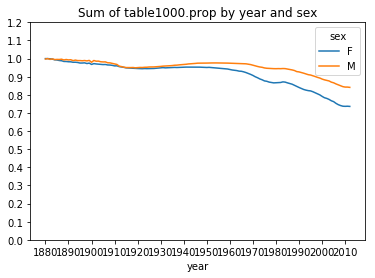

In [144]:
table = top1000.pivot_table('prop', index='year', columns = 'sex', aggfunc = sum)
table.plot(title='Sum of table1000.prop by year and sex', yticks = np.linspace(0, 1.2, 13), xticks=range(1880, 2020, 10))

In [153]:
df = boys[boys.year==2013]
df

,name,sex,births,year,prop


전체의 50%가 되기까지 얼마나 많은 이름이 등장하는지 알아본다.

In [154]:
prop_cumsum = df.sort_values(by='prop', ascending=False).prop.cumsum()

In [155]:
prop_cumsum[:10]

Series([], Name: prop, dtype: float64)

In [156]:
prop_cumsum.values.searchsorted(0.5)

0

In [157]:
df = boys[boys.year == 1900]
in1900 = df.sort_values(by='prop', ascending=False).prop.cumsum()
in1900.searchsorted(0.5) + 1

array([25], dtype=int64)

In [159]:
def get_quantile_count(group, q = 0.5):
    group = group.sort_values(by='prop', ascending=False)
    return group.prop.cumsum().values.searchsorted(q) + 1

In [162]:
diversity = top1000.groupby(['year', 'sex']).apply(get_quantile_count)
diversity[:10]

year  sex
1880  F      38
      M      14
1881  F      38
      M      14
1882  F      38
      M      15
1883  F      39
      M      15
1884  F      39
      M      16
dtype: int64

In [165]:
diversity = diversity.unstack('sex')
diversity.head()

sex,F,M
year,,
1880,38,14
1881,38,14
1882,38,15
1883,39,15
1884,39,16


연도별 이름의 다양성 측정

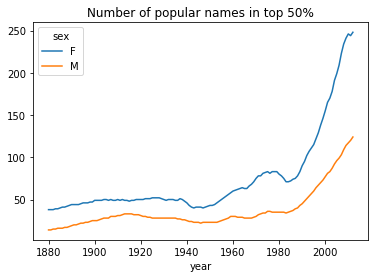

In [166]:
diversity.plot(title="Number of popular names in top 50%")

### 마지막 글자의 변화

In [168]:
get_last_letter = lambda x: x[-1]
last_letters = names.name.map(get_last_letter)
last_letters.name = 'last_letter'
table = names.pivot_table('births', index=last_letters, columns=['sex', 'year'], aggfunc=sum)

In [169]:
table

sex                F                                                        \
year            1880     1881     1882     1883     1884     1885     1886   
last_letter                                                                  
a            31446.0  31581.0  36536.0  38330.0  43680.0  45408.0  49100.0   
b                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
c                NaN      NaN      5.0      5.0      NaN      NaN      NaN   
d              609.0    607.0    734.0    810.0    916.0    862.0   1007.0   
e            33380.0  34080.0  40399.0  41914.0  48089.0  49616.0  53884.0   
f                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
g                7.0      5.0     12.0      8.0     24.0     11.0     18.0   
h             4863.0   4783.0   5567.0   5701.0   6602.0   6623.0   7146.0   
i               61.0     78.0     81.0     76.0     84.0     92.0     85.0   
j                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
k               13.0     15.0     11.0     17.0     21.0     18.0     27.0   
l             2541.0   2911.0   3527.0   3848.0   4808.0   5144.0   5721.0   
m               58.0     57.0     81.0     86.0     79.0     75.0    103.0   
n             3008.0   2959.0   3576.0   3837.0   4507.0   4735.0   5242.0   
o               30.0     49.0     35.0     47.0     74.0     84.0     93.0   
p                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
q                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
r              481.0    417.0    590.0    640.0    718.0    799.0    917.0   
s             1391.0   1316.0   1637.0   1794.0   2039.0   2127.0   2524.0   
t             2151.0   2165.0   2399.0   2554.0   2825.0   2889.0   3017.0   
u              380.0    427.0    410.0    444.0    490.0    495.0    511.0   
v                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
w                NaN      5.0      NaN      NaN      NaN      NaN      5.0   
x                NaN      NaN      NaN      7.0      NaN      NaN      NaN   
y            10468.0  10404.0  12144.0  12063.0  13918.0  13927.0  14933.0   
z              106.0     95.0    106.0    141.0    148.0    150.0    202.0   

sex                                       ...            M            \
year            1887     1888     1889    ...         2003      2004   
last_letter                               ...                          
a            48942.0  59441.0  58632.0    ...      37847.0   38668.0   
b                NaN      NaN      NaN    ...      48079.0   45937.0   
c                NaN      NaN      NaN    ...      27707.0   26792.0   
d             1027.0   1298.0   1374.0    ...      53419.0   51791.0   
e            54353.0  66750.0  66661.0    ...     144837.0  142175.0   
f                NaN      NaN      NaN    ...       1820.0    1906.0   
g               25.0     44.0     28.0    ...       2012.0    1838.0   
h             7141.0   8630.0   8825.0    ...      88284.0   89700.0   
i              105.0    141.0    134.0    ...      26019.0   28520.0   
j                NaN      NaN      NaN    ...       1205.0    1094.0   
k               19.0     21.0     22.0    ...      42304.0   41415.0   
l             6174.0   7900.0   8395.0    ...     153942.0  152895.0   
m               90.0    123.0    137.0    ...      42811.0   43072.0   
n             5512.0   6832.0   7103.0    ...     663680.0  676328.0   
o               97.0    134.0    142.0    ...      85444.0   88857.0   
p                NaN      NaN      NaN    ...       2984.0    2841.0   
q                NaN      NaN      NaN    ...        585.0     523.0   
r              910.0   1207.0   1214.0    ...     169926.0  169539.0   
s             2803.0   3582.0   3569.0    ...     138692.0  139714.0   
t             3140.0   3816.0   3784.0    ...      43788.0   43889.0   
u              476.0    541.0    469.0    ...       2052.0    2139.0   
v        

In [170]:
last_letters

0          y
1          a
2          a
3          h
4          e
5          t
6          a
7          e
8          a
9          h
10         e
11         a
12         a
13         e
14         a
15         a
16         a
17         e
18         e
19         e
20         e
21         l
22         e
23         e
24         e
25         a
26         e
27         h
28         e
29         e
          ..
1758989    r
1758990    n
1758991    n
1758992    e
1758993    k
1758994    i
1758995    r
1758996    n
1758997    m
1758998    n
1758999    n
1759000    r
1759001    e
1759002    n
1759003    n
1759004    i
1759005    n
1759006    n
1759007    r
1759008    h
1759009    y
1759010    s
1759011    n
1759012    r
1759013    l
1759014    n
1759015    i
1759016    n
1759017    s
1759018    s
Name: last_letter, Length: 1759019, dtype: object

In [172]:
subtable = table.reindex(columns=[1910, 1960, 2010], level='year')
subtable.head()

sex                 F                            M                    
year             1910      1960      2010     1910      1960      2010
last_letter                                                           
a            108395.0  691241.0  675559.0    977.0    5212.0   28796.0
b                 NaN     694.0     454.0    411.0    3914.0   39190.0
c                 5.0      49.0     953.0    482.0   15470.0   23296.0
d              6751.0    3729.0    2635.0  22113.0  262153.0   44726.0
e            133599.0  435042.0  316118.0  28663.0  178814.0  129999.0

In [175]:
subtable.sum()

sex  year
F    1910     396494.0
     1960    2022098.0
     2010    1771846.0
M    1910     194214.0
     1960    2132767.0
     2010    1912915.0
dtype: float64

In [176]:
letter_prop = subtable /subtable.sum().astype(float)

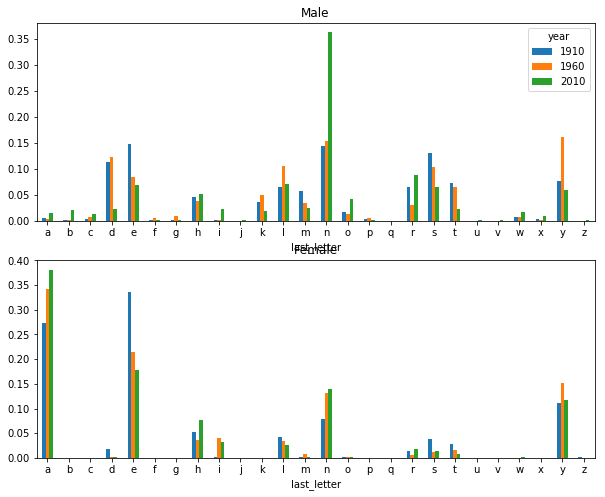

In [180]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 1, figsize=(10, 8))
letter_prop['M'].plot(kind='bar', rot=0, ax=axes[0], title='Male')
letter_prop['F'].plot(kind='bar', rot=0, ax=axes[1], title='Female', legend=False)

In [181]:
dny_ts = letter_prop.loc[['d', 'n', 'y'], 'M'].T

In [182]:
dny_ts.head()

last_letter,d,n,y
year,,,
1910,0.113859,0.143399,0.077348
1960,0.122917,0.152525,0.160981
2010,0.023381,0.362480,0.058177


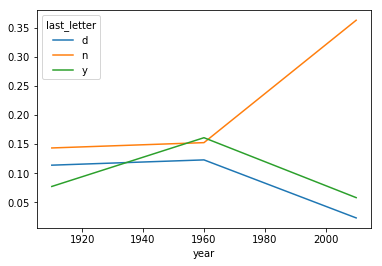

In [183]:
dny_ts.plot()

### 남자 이름과 여자 이름이 바뀐 경우

In [184]:
all_names = top1000.name.unique()

In [187]:
len(all_names)

6959

In [189]:
mask = np.array(['lesl' in x.lower() for x in all_names])
lesley_like = all_names[mask]

In [190]:
lesley_like

array(['Leslie', 'Lesley', 'Leslee', 'Lesli', 'Lesly'], dtype=object)

In [203]:
# filtered = top1000.name.isin(lesley_like)
filtered = top1000[top1000.name.isin(lesley_like)]
# len(filtered[filtered == True])
# filtered_true = filtered[filtered == True].index.values

In [204]:
filtered

,name,sex,births,year,prop
632,Leslie,F,8,1880,0.000088
1108,Leslie,M,79,1880,0.000715
2462,Leslie,F,11,1881,0.000120
3014,Leslie,M,92,1881,0.000913
4512,Leslie,F,9,1882,0.000083
4995,Leslie,M,122,1882,0.001073
5723,Lesley,M,6,1882,0.000053
6641,Leslie,F,7,1883,0.000062
6986,Leslie,M,120,1883,0.001147
7785,Lesley,M,5,1883,0.000048


In [200]:
filtered_true

array([   632,   1108,   2462,   3014,   4512,   4995,   5723,   6641,
         6986,   7785,   8421,   8991,  10596,  10988,  12716,  12990,
        14551,  14966,  16401,  16975,  18408,  18982,  20463,  20972,
        22365,  22974,  24468,  24969,  26423,  26971,  28341,  28963,
        30545,  30957,  32479,  32961,  34380,  34959,  36547,  36966,
        37692,  38634,  38972,  40528,  40967,  41718,  42458,  42965,
        43839,  44408,  44961,  46565,  46965,  47411,  48505,  48967,
        49842,  50471,  50970,  51664,  52554,  52963,  54518,  54971,
        56465,  56971,  57701,  58551,  58972,  60450,  60978,  61804,
        62609,  62993,  64596,  64984,  66603,  66981,  68580,  68979,
        70591,  70982,  72558,  72988,  74568,  74983,  76504,  76978,
        78528,  78981,  80636,  80986,  81856,  82531,  82982,  84535,
        84990,  85794,  86463,  86987,  88506,  88983,  90500,  90995,
        91805,  92476,  93002,  94516,  95002,  95862,  96569,  97004,
      

In [205]:
filtered.groupby('name').births.sum()

name
Leslee       993
Lesley     35029
Lesli        929
Leslie    373007
Lesly      10840
Name: births, dtype: int64

In [206]:
table = filtered.pivot_table('births', index = 'year', columns='sex', aggfunc='sum')

In [207]:
table = table.div(table.sum(1), axis=0)

In [208]:
table

sex,F,M
year,,
1880,0.091954,0.908046
1881,0.106796,0.893204
1882,0.065693,0.934307
1883,0.053030,0.946970
1884,0.107143,0.892857
1885,0.075758,0.924242
1886,0.055556,0.944444
1887,0.067416,0.932584
1888,0.116162,0.883838


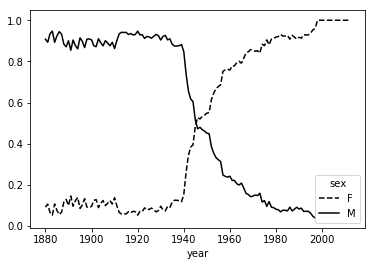

In [209]:
table.plot(style={'M': 'k-', 'F':'k--'})